In [1]:
import glob
import numpy as np
import math
import cv2
from cv2 import aruco
import os
import json

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import pprint as pp

In [2]:
def getVectorFromDic(idx0,idx1):
    return marker_dict[idx0]["tvec"] - marker_dict[idx1]["tvec"]

def getPositionFromDic(idx0):
    return marker_dict[idx0]["tvec"]

# idx0: origin
def getAngleFromDic(idx1,idx0,idx2):
    return getAngle(getVectorFromDic(idx2,idx0),getVectorFromDic(idx1,idx0))

def getDistanceFromDic(idx0,idx1):
     return np.linalg.norm(getVectorFromDic(idx0,idx1))
    
def getJointVec(arr,joint_num):
    return np.array(arr[joint_num*4:joint_num*4+3])

def normalization(vec):
    return vec/np.linalg.norm(vec)

def getSize(vec):
    return np.linalg.norm(vec)

def dotproduct(v1, v2):
    return sum((a*b) for a, b in zip(v1, v2))

def length(v):
    return math.sqrt(dotproduct(v, v))

def getAngle(v1, v2):
    return math.degrees(math.acos(dotproduct(v1, v2) / (length(v1) * length(v2))))

def vec_norm(vec):
    return vec/np.linalg.norm(vec)

def getUpVectorFromRvecs(idx):
    rtx = cv2.Rodrigues(rvecs[idx])[0]
    return rtx.T[2]

# Get Camera Parameters

In [3]:
parameter_dir=r"C:\Users\ZAIO\dev\python_aruco_marker_visualization\camera_parameters"

#load xml file
camera_parameters = {}
# camera_idxs = ["18284509","18284511","18284512"]
camera_idxs = ["18284509"]

parameter_types = ["CameraMatrix","Intrinsics","Distortion"]


for camera_idx in camera_idxs:
    fileToLoad = os.path.join(parameter_dir,camera_idx+".xml")
    fs = cv2.FileStorage(fileToLoad, cv2.FILE_STORAGE_READ)
    _camera_parameter = {}
    for parameter_type in parameter_types:
        _camera_parameter[parameter_type] = fs.getNode(parameter_type).mat()
        camera_parameters[camera_idx] = _camera_parameter

#3d points to image (2nd image)
extri = [0]*3
intri  = [0]*3
dist = [0]*3

for i in range(len(camera_idxs)):
    rotation_matrix = camera_parameters[camera_idxs[i]][parameter_types[0]][:,0:3]
    rvec,_ = cv2.Rodrigues(rotation_matrix)
    tvec = camera_parameters[camera_idxs[i]][parameter_types[0]][:,3]
    
    extri[i] = camera_parameters[camera_idxs[i]][parameter_types[0]]
    intri[i] = camera_parameters[camera_idxs[i]][parameter_types[1]]
    dist[i] = camera_parameters[camera_idxs[i]][parameter_types[2]]
    
camera_index = 0

mtx = camera_parameters[camera_idxs[camera_index]][parameter_types[1]]
dist = camera_parameters[camera_idxs[camera_index]][parameter_types[2]]
pp.pprint(mtx)
pp.pprint(dist)


array([[1.59106837e+03, 0.00000000e+00, 6.34909755e+02],
       [0.00000000e+00, 1.59838858e+03, 5.01707782e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])
array([[ 1.36945721e-02],
       [-1.94217874e-01],
       [ 2.42371839e-04],
       [ 6.03200809e-04],
       [-4.39915075e+00],
       [ 3.17459364e-03],
       [-3.13005525e-01],
       [-3.73922900e+00]])


In [4]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_250)
length_of_axis = 0.09
markerLength = 0.18


image_data = r"I:\20200730_mutliplearcuo\000000000000_rendered.png"
frame  = cv2.imread(image_data,cv2.IMREAD_UNCHANGED)
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)


frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

rvecs,tvecs, objPts = aruco.estimatePoseSingleMarkers(corners, markerLength , mtx, dist)
imaxis = aruco.drawDetectedMarkers(frame.copy(), corners, ids)


for i in range(len(rvecs)):
    imaxis = aruco.drawAxis(imaxis, mtx, dist, rvecs[i], tvecs[i], length_of_axis)



# Marker data to dictionary
marker_dict = {}

for idx,marker_index in enumerate(ids):
    marker_index = marker_index[0]
    _vecs = {}
    _vecs["rvec"] = rvecs[idx][0]
    _vecs["tvec"] = tvecs[idx][0]
    _vecs["corner"] = corners[idx][0]
    marker_dict[marker_index] = _vecs
print("tvecs and rvecs for each marker\n")
# pp.pprint(marker_dict)



tvecs and rvecs for each marker



In [5]:
print(distance.euclidean(marker_dict[0]["tvec"],marker_dict[1]["tvec"]))
print(distance.euclidean(marker_dict[1]["tvec"],marker_dict[2]["tvec"]))
print(distance.euclidean(marker_dict[2]["tvec"],marker_dict[3]["tvec"]))
print(distance.euclidean(marker_dict[3]["tvec"],marker_dict[4]["tvec"]))

NameError: name 'distance' is not defined

In [6]:
# def annotateDistanceFromDic(idx0,idx1):

def getCenterOnImageFromDic(idx):
    return np.average(marker_dict[idx]["corner"],axis = 0)

In [7]:
# def annotateDistanceFromDic(idx0,idx1):

def getCenterOnImageFromDic(idx):
    return np.average(marker_dict[idx]["corner"],axis = 0)


In [8]:
imagefiles = glob.glob(r'I:\20200810_CameraTest\few\selected\*.png')

In [9]:
imagefiles = [r"I:\20200818_ChessboardDetection\cam01\selected\000000000020_rendered.png"]

In [11]:
import numpy as np
# import cv2, PIL, os
from cv2 import aruco
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

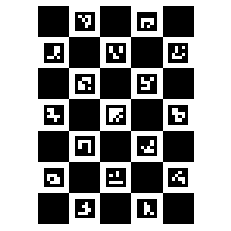

In [12]:
workdir = r"C:\Users\ZAIO\Desktop\Wing"
#Aruco Dictionary
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_250)
# create  Charuco board
board = aruco.CharucoBoard_create(5, 7, 0.14, 0.088, aruco_dict)
imboard = board.draw((2000, 2000))
cv2.imwrite(workdir + "chessboard.tiff", imboard)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.imshow(imboard, cmap = mpl.cm.gray, interpolation = "nearest")
ax.axis("off")
plt.show()




tvecs and rvecs for each marker



<Figure size 432x288 with 0 Axes>

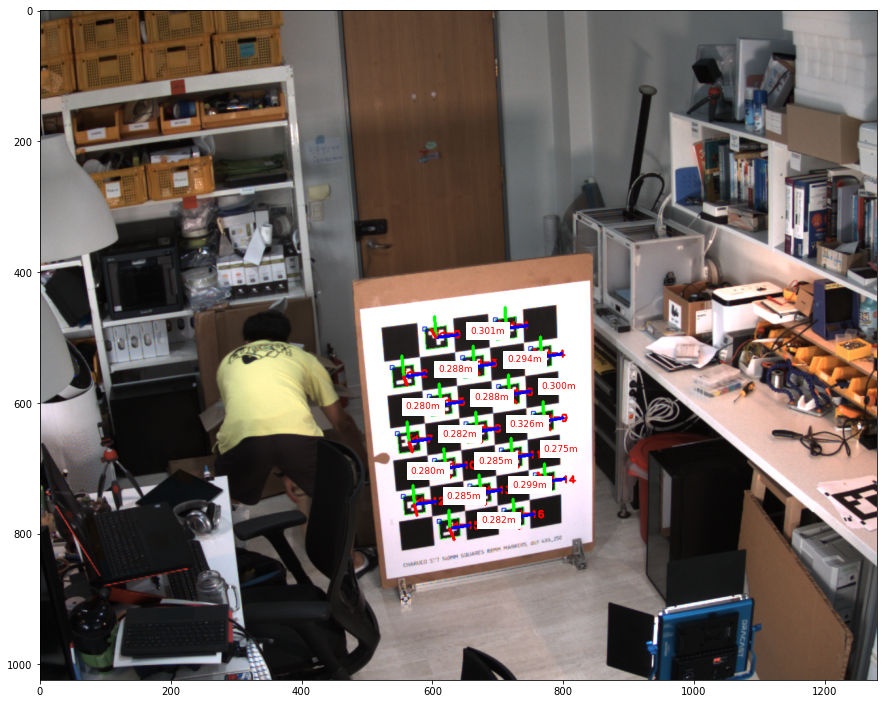

In [10]:
for image_data in imagefiles:
    image_data = image_data

    aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_1000)
    length_of_axis = 0.09
    markerLength = 0.088
    frame  = cv2.imread(image_data,cv2.IMREAD_UNCHANGED)
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    parameters =  aruco.DetectorParameters_create()
    corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)

    frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

    rvecs,tvecs, objPts = aruco.estimatePoseSingleMarkers(corners, markerLength , mtx, dist)
    imaxis = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

    if(len(rvecs)>0):
        for i in range(len(rvecs)):
            imaxis = aruco.drawAxis(imaxis, mtx, dist, rvecs[i], tvecs[i], length_of_axis)



        # Marker data to dictionary
        marker_dict = {}

        for idx,marker_index in enumerate(ids):
            marker_index = marker_index[0]
            _vecs = {}
            _vecs["rvec"] = rvecs[idx][0]
            _vecs["tvec"] = tvecs[idx][0]
            _vecs["corner"] = corners[idx][0]
            marker_dict[marker_index] = _vecs
        print("tvecs and rvecs for each marker\n")
        # pp.pprint(marker_dict)

        plt.figure()
        plt.figure(figsize=(15,15))

        for idx0,idx1 in [[0,1],[2,3],[3,4],[5,6],[7,8],[8,9],[10,11],[12,13],[13,14],[15,16],[2,7],[7,12],[4,9],[9,14]]:
            cen_x, cen_y = np.average([getCenterOnImageFromDic(idx0),getCenterOnImageFromDic(idx1)],axis = 0)
            distance = getDistanceFromDic(idx0,idx1)
            text = plt.text(int(cen_x), int(cen_y), "{:.3f}m".format(distance), fontsize=9,color = "red")
            text.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))

        plt.imshow(imaxis)
        plt.show()

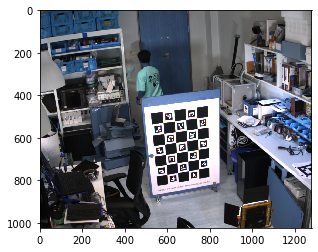

In [13]:
#Post processing
frame = cv2.imread(r"I:\20200818_ChessboardDetection\cam01\selected\000000000021_rendered.png")
frame = cv2.undistort(src = frame, cameraMatrix = mtx, distCoeffs = dist)
plt.figure()
plt.imshow(frame, interpolation = "nearest")
plt.show()



In [14]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict,
                                                      parameters=parameters)
# SUB PIXEL DETECTION
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.0001)
for corner in corners:
    cv2.cornerSubPix(gray, corner, winSize = (3,3), zeroZone = (-1,-1), criteria = criteria)

frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

corners

[array([[[609.45184, 780.8149 ],
         [640.63727, 775.521  ],
         [642.5382 , 802.61395],
         [611.6195 , 807.9021 ]]], dtype=float32),
 array([[[709.2654 , 763.7745 ],
         [739.1417 , 758.66943],
         [740.3094 , 785.577  ],
         [710.3902 , 790.84485]]], dtype=float32),
 array([[[554.7618 , 743.2197 ],
         [586.5968 , 738.3992 ],
         [589.11383, 766.40985],
         [557.4749 , 771.33   ]]], dtype=float32),
 array([[[657.0812 , 727.0732 ],
         [688.2222 , 721.9731 ],
         [689.56537, 750.08936],
         [658.93396, 755.1682 ]]], dtype=float32),
 array([[[756.7546 , 710.3434 ],
         [786.4135 , 704.98914],
         [787.11725, 732.56287],
         [757.4056 , 738.299  ]]], dtype=float32),
 array([[[602.7612 , 687.9183 ],
         [634.4793 , 683.2142 ],
         [636.50104, 712.2303 ],
         [605.01404, 717.1931 ]]], dtype=float32),
 array([[[705.0655 , 671.8856 ],
         [736.11035, 666.9228 ],
         [737.01025, 695.77576],
 

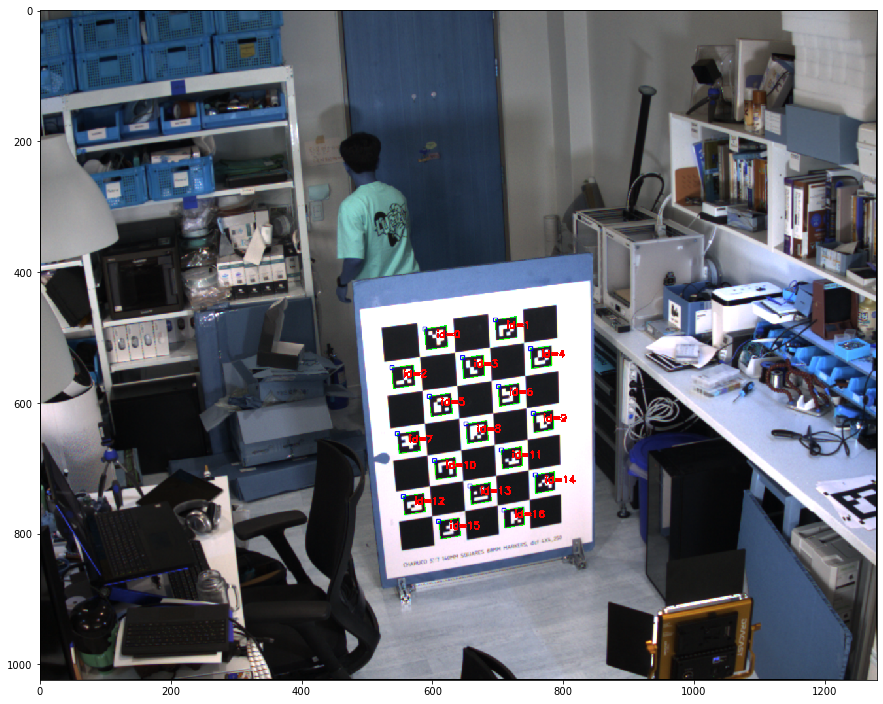

In [15]:
plt.figure(figsize=(15,15))
plt.imshow(frame_markers, interpolation = "nearest")
plt.show()


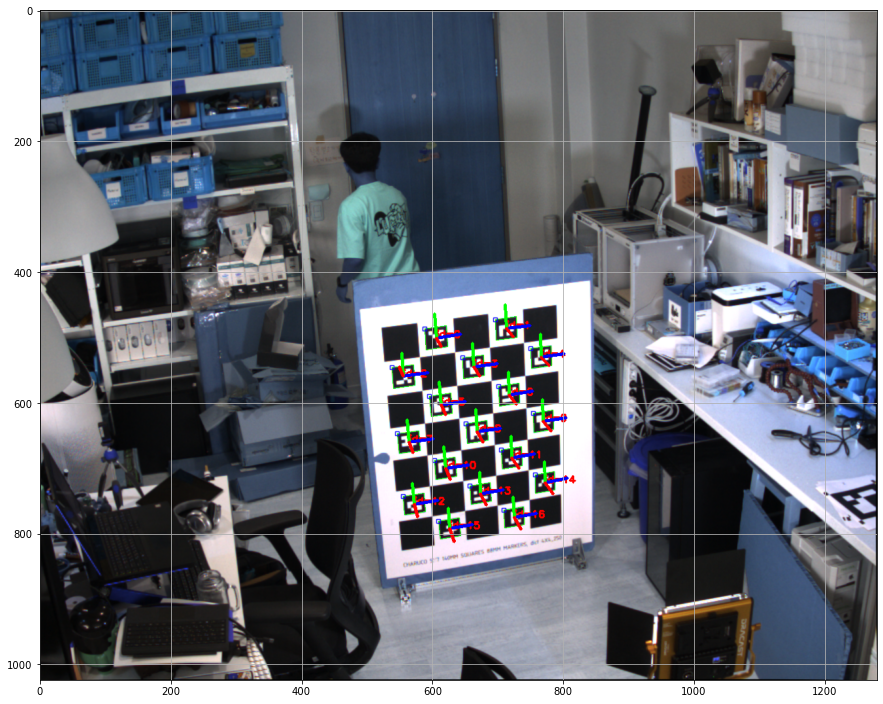

In [16]:
size_of_marker =  0.088 # side lenght of the marker in meter
rvecs,tvecs,objPts = aruco.estimatePoseSingleMarkers(corners, size_of_marker , mtx, dist)
length_of_axis = 0.1
imaxis = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

for i in range(len(tvecs)):
    imaxis = aruco.drawAxis(imaxis, mtx, dist, rvecs[i], tvecs[i], length_of_axis)
plt.figure(figsize=(15,15))
plt.imshow(imaxis)
plt.grid()
plt.show()

In [17]:
data = pd.DataFrame(data = tvecs.reshape(len(tvecs),3), columns = ["tx", "ty", "tz"],
                    index = ids.flatten())
data.index.name = "marker"
data.sort_index(inplace= True)
data


tx        ty        tz
marker                              
0      -0.076300 -0.003004  4.141096
1       0.205188 -0.040147  4.198347
2      -0.207103  0.149673  4.141813
3       0.072931  0.113044  4.189633
4       0.356241  0.076632  4.311865
5      -0.058390  0.266682  4.208508
6       0.220182  0.229413  4.265904
7      -0.190409  0.422348  4.262875
8       0.089572  0.382703  4.288765
9       0.370368  0.347030  4.381530
10     -0.041416  0.538147  4.335036
11      0.236968  0.497989  4.370822
12     -0.172203  0.689709  4.356156
13      0.106509  0.651541  4.397657
14      0.383357  0.612342  4.453775
15     -0.024523  0.799967  4.410924
16      0.254662  0.770207  4.511523

In [18]:
datar = pd.DataFrame(data = tvecs.reshape(len(rvecs),3), columns = ["rx", "ry", "rz"],
                    index = ids.flatten())
datar.index.name = "marker"
datar.sort_index(inplace= True)
np.degrees(datar)

rx         ry          rz
marker                                  
0       -4.371654  -0.172129  237.267321
1       11.756419  -2.300247  240.547573
2      -11.866144   8.575617  237.308407
3        4.178644   6.476924  240.048273
4       20.411128   4.390701  247.051686
5       -3.345491  15.279767  241.129748
6       12.615490  13.144373  244.418299
7      -10.909642  24.198781  244.244763
8        5.132093  21.927267  245.728116
9       21.220517  19.883351  251.043178
10      -2.372986  30.833562  248.379292
11      13.577252  28.532675  250.429676
12      -9.866520  39.517427  249.589362
13       6.102522  37.330550  251.967203
14      21.964713  35.084621  255.182515
15      -1.405038  45.834753  252.727330
16      14.591082  44.129593  258.491232

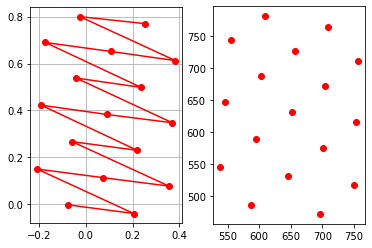

In [19]:
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(1,2,1)
ax.set_aspect("equal")
plt.plot(data.tx, data.ty, "or-")
plt.grid()
ax = fig.add_subplot(1,2,2)
plt.plot(np.array(corners)[:, 0, 0,0], np.array(corners)[:, 0, 0,1], "or")
plt.show()

True


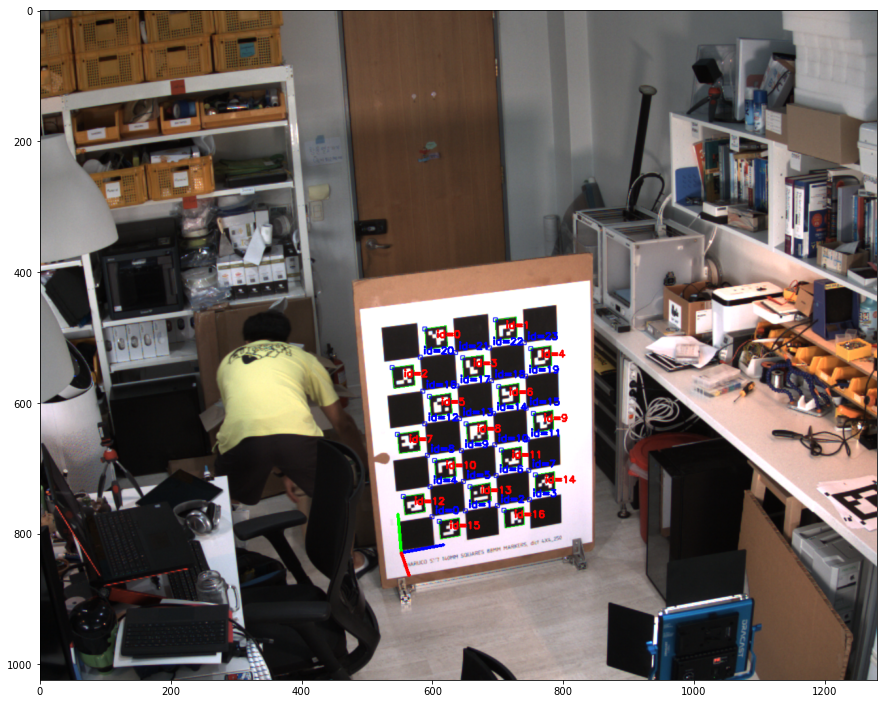

In [104]:
#detect Charucoboad with calibration pose
image_data = r"I:\20200818_ChessboardDetection\cam01\selected\000000000020_rendered.png"
frame  = cv2.imread(image_data,cv2.IMREAD_UNCHANGED)
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

markerCorners, markerIds, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
imaxis = aruco.drawDetectedMarkers(frame.copy(), markerCorners, markerIds)
retval,charucoCorners,charucoIds= cv2.aruco.interpolateCornersCharuco(corners,ids,gray,board)
imaxis_charuco = cv2.aruco.drawDetectedCornersCharuco(imaxis,charucoCorners,charucoIds,(0,0,255))

rvecs, tvecs, _objPoints=cv2.aruco.estimatePoseSingleMarkers(	corners, markerLength, mtx, dist)
retval, rvec, tvec = cv2.aruco.estimatePoseCharucoBoard(charucoCorners, charucoIds, board, mtx, dist,rvecs,tvecs)
imaxis_final= cv2.aruco.drawAxis(imaxis_charuco,mtx, dist, rvec,tvec,length = 0.18)
plt.figure(figsize=(15,15))
plt.imshow(imaxis_charuco)
plt.show()

In [176]:
#detect Charucoboad with calibration pose
image_data = r"I:\20200818_ChessboardDetection02\cam01\floor_selected\000000000020_rendered.png"
frame  = cv2.imread(image_data,cv2.IMREAD_UNCHANGED)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

markerCorners, markerIds, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
imaxis = aruco.drawDetectedMarkers(frame, markerCorners, markerIds)
retval,charucoCorners,charucoIds= cv2.aruco.interpolateCornersCharuco(markerCorners,markerIds,gray,board)
imaxis_charuco = cv2.aruco.drawDetectedCornersCharuco(imaxis,charucoCorners,charucoIds,(0,255,0))

rvecs, tvecs, _objPoints=cv2.aruco.estimatePoseSingleMarkers(charucoCorners, markerLength, mtx, dist)
retval, rvec, tvec = cv2.aruco.estimatePoseCharucoBoard(charucoCorners, charucoIds, board, mtx, dist,rvecs,tvecs)
imaxis_final= cv2.aruco.drawAxis(imaxis_charuco,mtx, dist, rvec,tvec,length = 0.18)


plt.figure(figsize=(15,15))
plt.imshow(gray)
plt.show()

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\calib3d\src\solvepnp.cpp:754: error: (-215:Assertion failed) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) ) && npoints == std::max(ipoints.checkVector(2, CV_32F), ipoints.checkVector(2, CV_64F)) in function 'cv::solvePnPGeneric'
